# Numerical Integration with SciPy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
import sympy
import mpmath
sympy.init_printing()

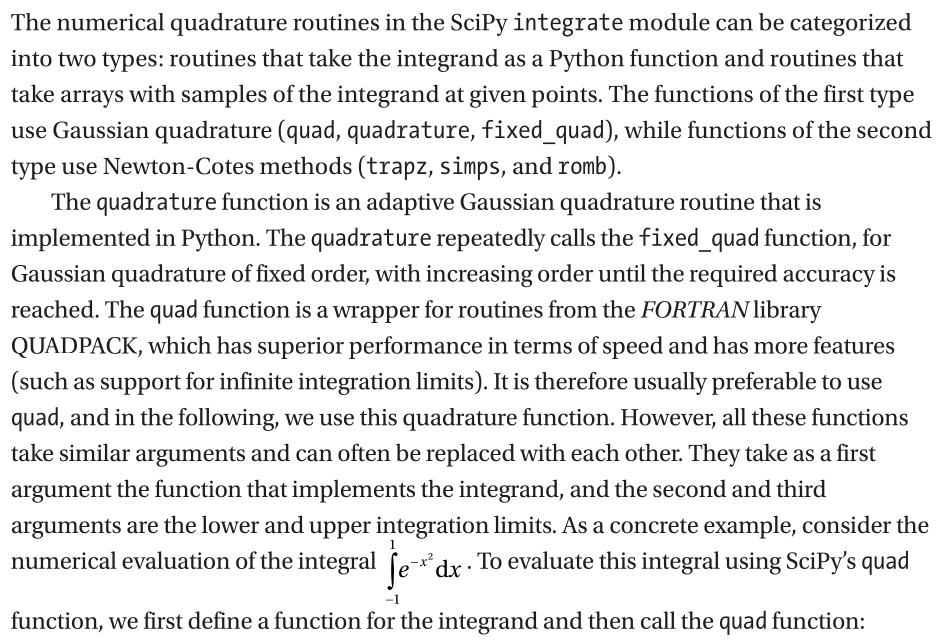

In [4]:
def f(x):
    return np.exp(-x**2)

val, err = integrate.quad(f, -1, 1)

# Result
val, err

> The quad function returns a tuple that contains the numerical estimate of the
integral, `val`, and an estimate of the absolute error, `err`

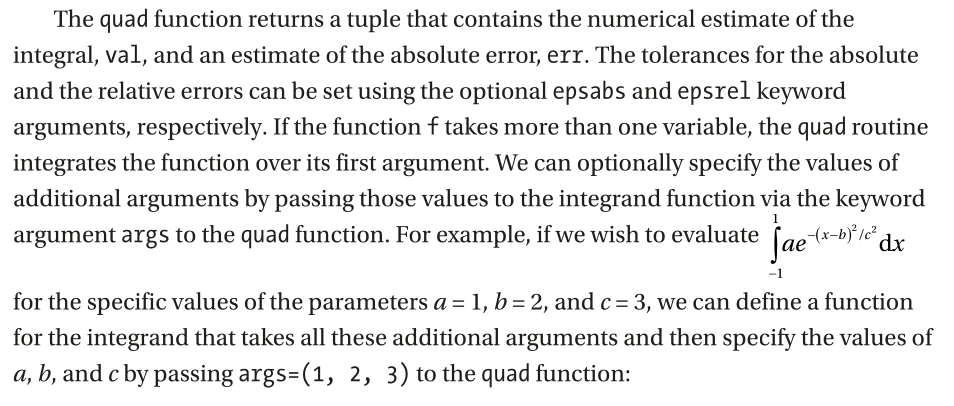

In [5]:
def f(x, a, b, c):
    return a * np.exp(-((x - b)/c)**2)

val, err = integrate.quad(f, -1, 1, args=(1, 2, 3))

val, err

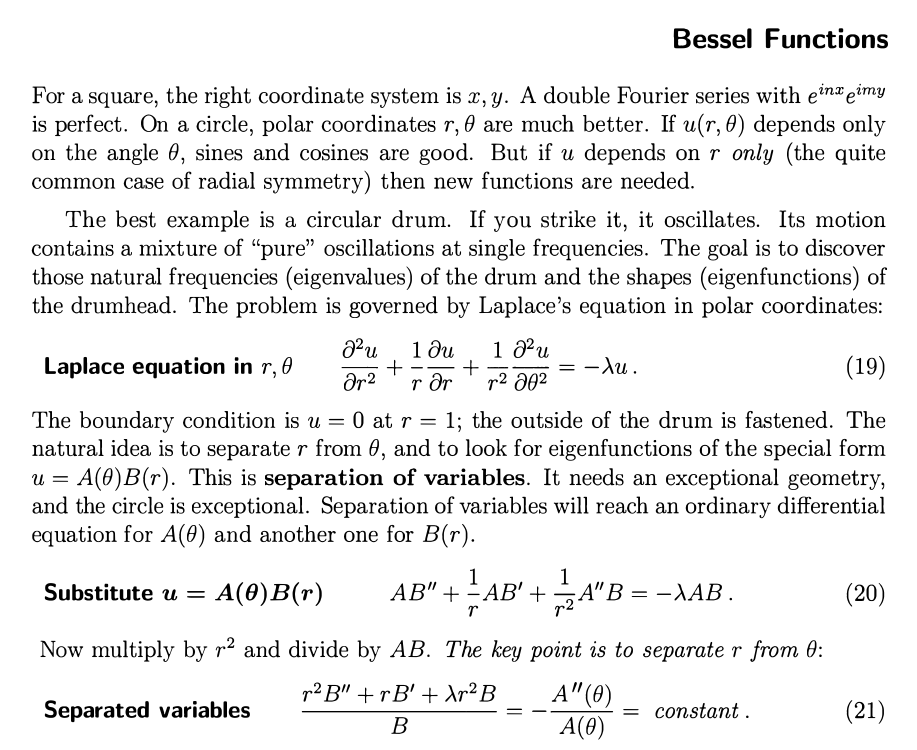

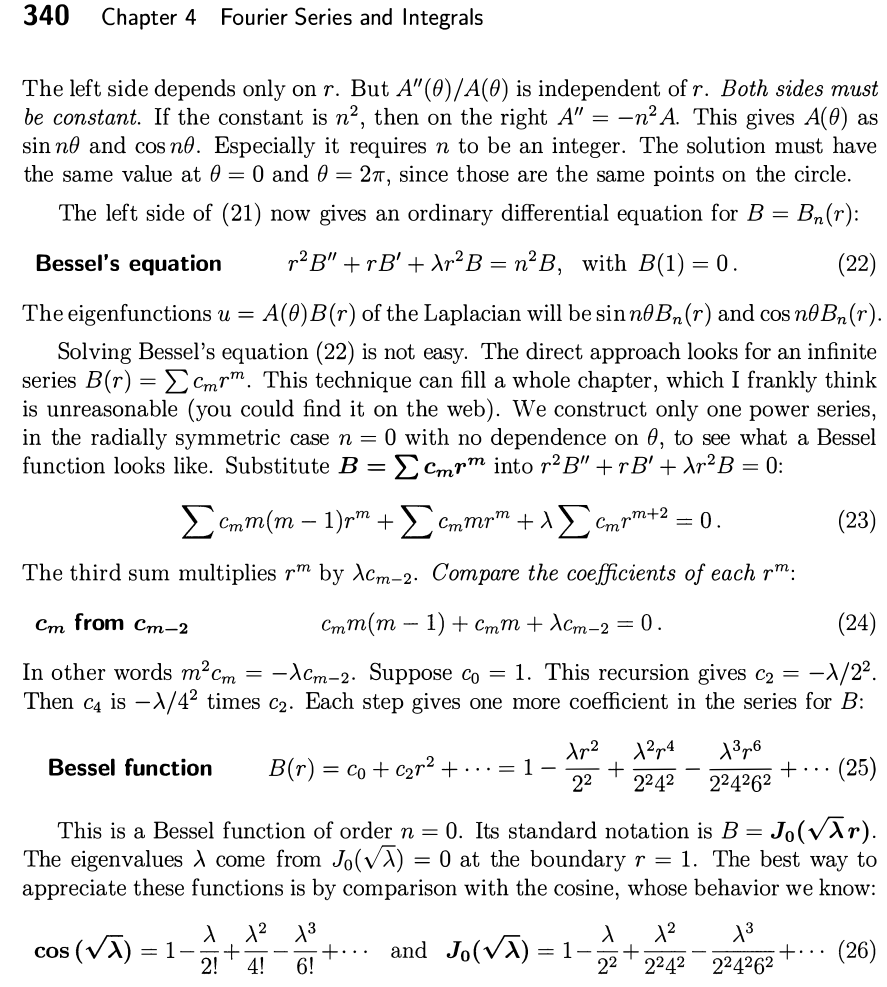

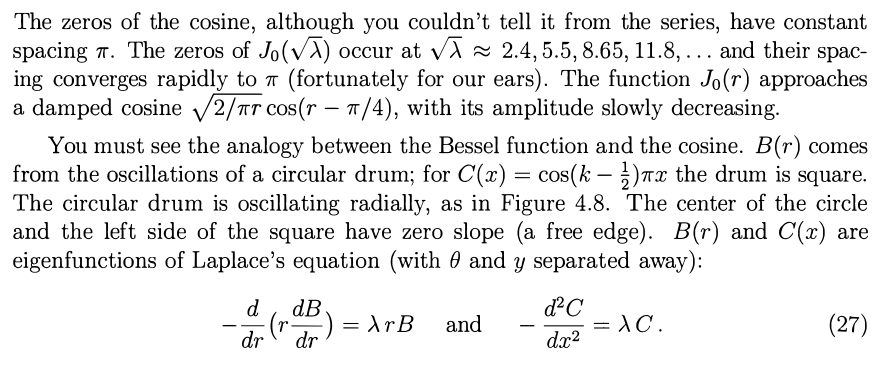

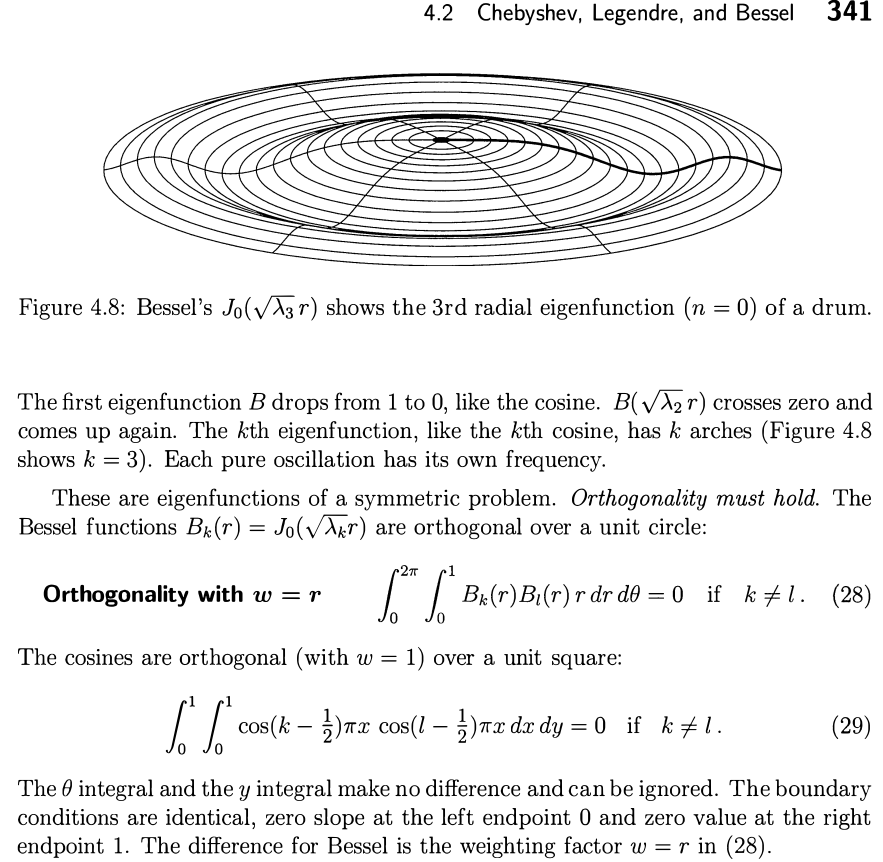

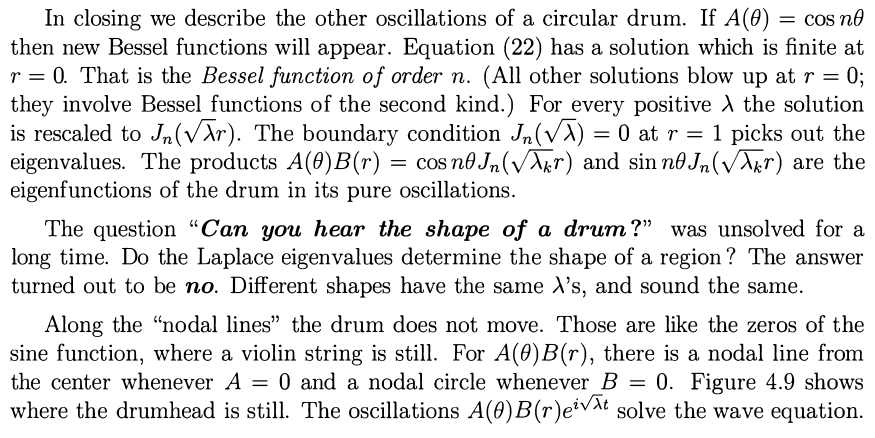

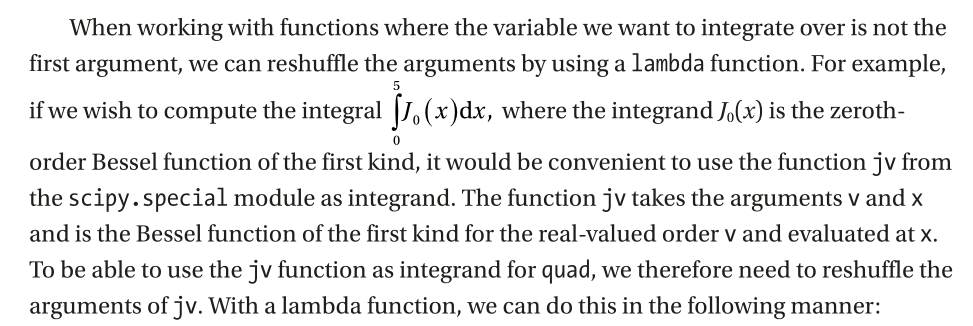

In [7]:
from scipy.special import jv

In [10]:
f = lambda x: jv(0, x)

val, err = integrate.quad(f, 0, 5)
val, err

However, note that the quadrature and `fixed_quad` functions only support finite
integration limits. With a bit of extra guidance, the quad function is also able to handle many integrals
with integrable singularities. For example, consider the integral $\int_{-1}^1 \frac{1}{\sqrt |x|} dx$ The integrand
diverges at `x = 0`, but the value of the integral does not diverge, and its value is `4`! Naively
trying to compute this integral using quad may fail because of the diverging integrand

In [24]:
# Our diverges function
f = lambda x: 1/np.sqrt(abs(x))

a, b = -1, 1

# Error, point 0 is not save to eveluate the integral, divergence!
integrate.quad(f, a, b)

/tmp/ipykernel_57914/3798036514.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x: 1/np.sqrt(abs(x))


> Example of a diverging integrand with finite integral (green/shaded
area) that can be computed using the quad function

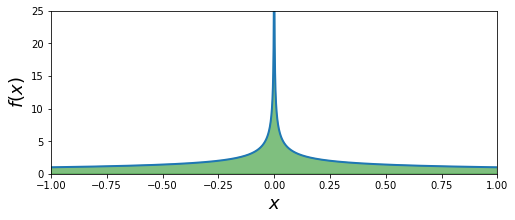

In [19]:
fig, ax = plt.subplots(figsize=(8, 3))
x = np.linspace(a, b, 10000)

# Plot the function
ax.plot(x, f(x), lw=2)

# Fill the region
ax.fill_between(x, f(x), color='green', alpha=0.5)

# Mark the axis
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$f(x)$", fontsize=18)

# Setup the limits
ax.set_ylim(0, 25)
ax.set_xlim(-1, 1)

You can clearly see the spike in the $[0, 0]$ coors

In this case the evaluation of the integral fails because the integrand diverges exactly
at one of the sample points in the **Gaussian quadrature rule (the midpoint)**. We can
guide the quad routine by specifying a list of points that should be avoided using the
points keyword arguments, and using `points=[0]` in the current example allows quad to
correctly evaluate the integral:

In [23]:
# Skip the points where it's not save to evaluate the integral
integrate.quad(f, a, b, points=[0])